<a href="https://colab.research.google.com/github/priyanka0178885547/ML-LAB/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('/content/titanic_train.csv')
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [7]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
[col for col in df.columns if df[col].isnull().sum()>0]


['Age', 'Cabin', 'Embarked']

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [10]:
df=df.drop(['Embarked','Cabin'],axis=1)

In [11]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [12]:
from sklearn.metrics import roc_auc_score

In [13]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [14]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [15]:
X = pd.get_dummies(X,drop_first=True)


In [16]:
from sklearn.model_selection import train_test_split


In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

0


In [19]:
sfs1=SFS(RandomForestClassifier(n_jobs=4),k_features=5,forward=True,verbose=2,scoring='roc_auc' or 'accuracy',cv=3)


In [20]:
sfs1=sfs1.fit(np.array(x_train.fillna(0)),y_train)

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.0s finished

[2025-08-27 10:41:59] Features: 1/5 -- score: 0.765194136612553[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished

[2025-08-27 10:42:04] Features: 2/5 -- score: 0.832223720877483[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s finished

[2025-08-27 10:42:07] Features: 3/5 -- score: 0.8381843183953857[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s finished

[2025-08-27 10:42:10] Features: 4/5 -- score: 0.8429135883477527[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s finished

[2025-08-27 10:42:11] Features: 5/5 -- score: 0.8467171348951751

In [21]:
print('best accracy score',sfs1.k_score_)
print('best subset(indices)',sfs1.k_feature_idx_)
print('Best subset (corresponding names):', sfs1.k_feature_names_)

best accracy score 0.8467171348951751
best subset(indices) (0, 1, 2, 4, 5)
Best subset (corresponding names): ('0', '1', '2', '4', '5')


In [22]:
sfs2=SFS(RandomForestClassifier(n_jobs=4),k_features=5,forward=False,verbose=2,scoring='roc_auc' or 'accuracy',cv=3)
sfs2=sfs2.fit(np.array(x_train.fillna(0)),y_train)
print('best accracy score',sfs2.k_score_)
print('best subset(indices)',sfs2.k_feature_idx_)
print('Best subset (corresponding names):', sfs2.k_feature_names_)

best accracy score 0.8450973720877483
best subset(indices) (0, 1, 3, 4, 5)
Best subset (corresponding names): ('0', '1', '3', '4', '5')


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.0s finished

[2025-08-27 10:42:25] Features: 5/5 -- score: 0.8450973720877483

In [23]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs=EFS(RandomForestClassifier(n_jobs=4),min_features=1,max_features=4,scoring='accuracy',cv=5)
efs=efs.fit(x_train,y_train)
print('best accuracy score',efs.best_score_)
print('best subset(indices)',efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

Features: 56/56

best accuracy score 0.8170967741935483
best subset(indices) (0, 1, 2, 5)
Best subset (corresponding names): ('Pclass', 'Age', 'SibSp', 'Sex_male')


In [24]:
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.608, 0.544, 0.608, 0.5806451612903226, 0.60...",0.589097,"(Age,)",0.031836,0.024769,0.012385
12,"(1, 3)","[0.56, 0.568, 0.64, 0.6209677419354839, 0.6129...",0.600374,"(Age, Parch)",0.039945,0.031079,0.015539
34,"(1, 3, 4)","[0.584, 0.6, 0.616, 0.5887096774193549, 0.6290...",0.603548,"(Age, Parch, Fare)",0.021655,0.016849,0.008424
11,"(1, 2)","[0.64, 0.584, 0.616, 0.5645161290322581, 0.620...",0.605097,"(Age, SibSp)",0.034873,0.027133,0.013566
3,"(3,)","[0.568, 0.6, 0.672, 0.6048387096774194, 0.6451...",0.618,"(Parch,)",0.046877,0.036472,0.018236
31,"(1, 2, 3)","[0.624, 0.576, 0.688, 0.5967741935483871, 0.61...",0.619535,"(Age, SibSp, Parch)",0.048654,0.037854,0.018927
13,"(1, 4)","[0.616, 0.608, 0.632, 0.6048387096774194, 0.63...",0.619587,"(Age, Fare)",0.016513,0.012848,0.006424
2,"(2,)","[0.624, 0.6, 0.656, 0.5645161290322581, 0.7177...",0.632452,"(SibSp,)",0.066955,0.052094,0.026047
21,"(0, 1, 2)","[0.616, 0.632, 0.712, 0.5967741935483871, 0.64...",0.640387,"(Pclass, Age, SibSp)",0.050499,0.03929,0.019645
32,"(1, 2, 4)","[0.672, 0.664, 0.648, 0.6048387096774194, 0.63...",0.645187,"(Age, SibSp, Fare)",0.030275,0.023555,0.011778


In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, criterion='gini')
rfc.fit(x_train, y_train)
for feature in zip(x_train.columns, rfc.feature_importances_):
    print(feature)


('Pclass', np.float64(0.08580548090109545))
('Age', np.float64(0.26433757901109173))
('SibSp', np.float64(0.05355992352286061))
('Parch', np.float64(0.03699908167792097))
('Fare', np.float64(0.28790097031129963))
('Sex_male', np.float64(0.2713969645757317))


In [26]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(estimator=rfc, threshold=0.2)
sfm = sfm.fit(x_train, y_train)
feature_names=x_train.columns
print('The most important features based on random forest classifier:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

The most important features based on random forest classifier:
- Age
- Fare
- Sex_male


In [27]:
from sklearn.metrics import accuracy_score
rfc_full = RandomForestClassifier(random_state=0, criterion='gini')
rfc_full.fit(x_train, y_train)
pred_full = rfc_full.predict(x_test)
print('The accuracy of classifier with full features: {:.2f}'.format(accuracy_score(y_test, pred_full)))


The accuracy of classifier with full features: 0.82


In [28]:
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

In [29]:
rfc_lim = RandomForestClassifier(random_state=0, criterion='gini')
rfc_lim.fit(x_important_train, y_train)
pred_lim = rfc_lim.predict(x_important_test)
print('The accuracy of classifier with limited features: {:.2f}'.format(accuracy_score(y_test, pred_lim)))

The accuracy of classifier with limited features: 0.80


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [32]:
x_scaled.shape

(891, 6)

In [33]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

In [34]:
x_pca.shape

(891, 2)

In [35]:
y.shape

(891,)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.3,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

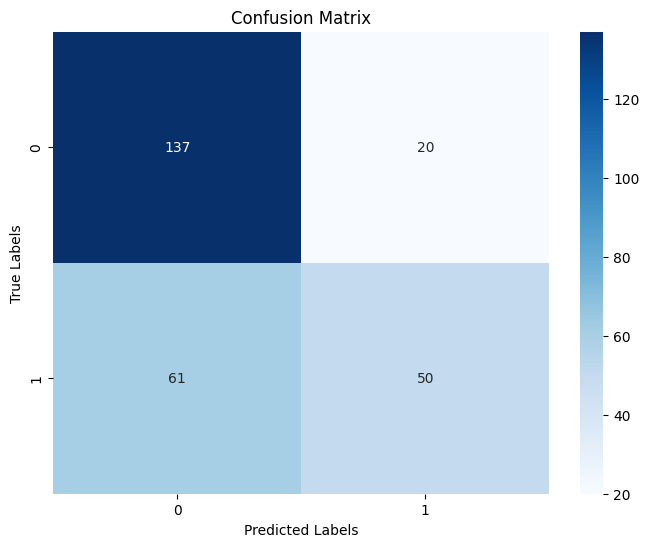

In [37]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

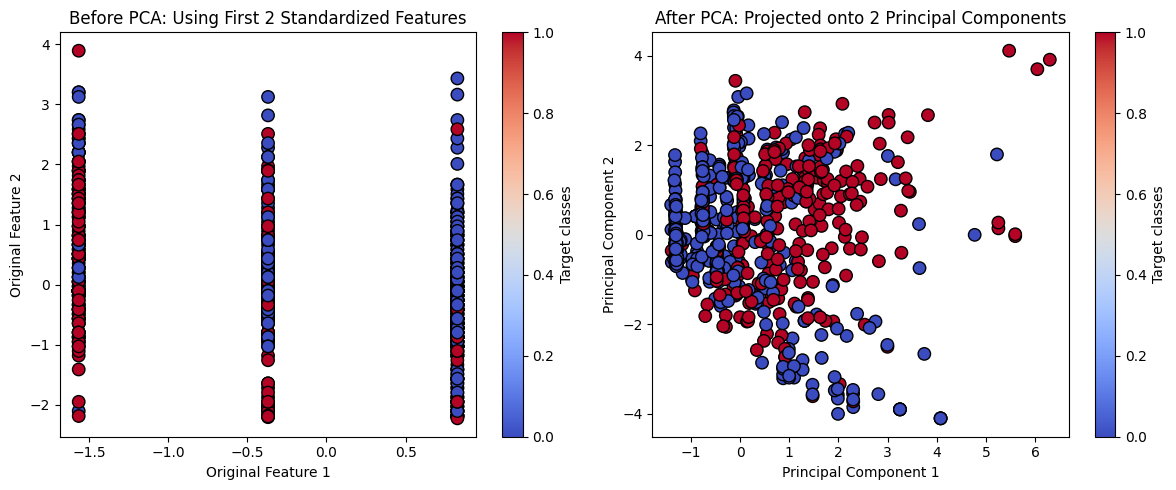

In [38]:
y_numeric = pd.factorize(y)[0]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()